## Задание по программированию: Выбор числа соседей

In [9]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

1. Загрузите выборку Wine по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data (файл также приложен к этому заданию)

In [5]:
new_names=['Canary', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_2/wine.data',names=new_names)
data.head(5)

,Canary,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


2. Извлеките из данных признаки и классы. Класс записан в первом столбце (три варианта), признаки — в столбцах со второго по последний. Более подробно о сути признаков можно прочитать по адресу https://archive.ics.uci.edu/ml/datasets/Wine (см. также файл wine.names, приложенный к заданию)

In [6]:
X = data['Canary']
y = data[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']]


3. Оценку качества необходимо провести методом кросс-валидации по 5 блокам (5-fold). Создайте генератор разбиений, который перемешивает выборку перед формированием блоков (shuffle=True). Для воспроизводимости результата, создавайте генератор KFold с фиксированным параметром random_state=42. В качестве меры качества используйте долю верных ответов (accuracy).

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.split(X, y)

<generator object _BaseKFold.split at 0x7fbf51a9cf48>

3. Найдите точность классификации на кросс-валидации для метода k ближайших соседей (sklearn.neighbors.KNeighborsClassifier), при k от 1 до 50. При каком k получилось оптимальное качество? Чему оно равно (число в интервале от 0 до 1)? Данные результаты и будут ответами на вопросы 1 и 2.

0.7304761904761905 1


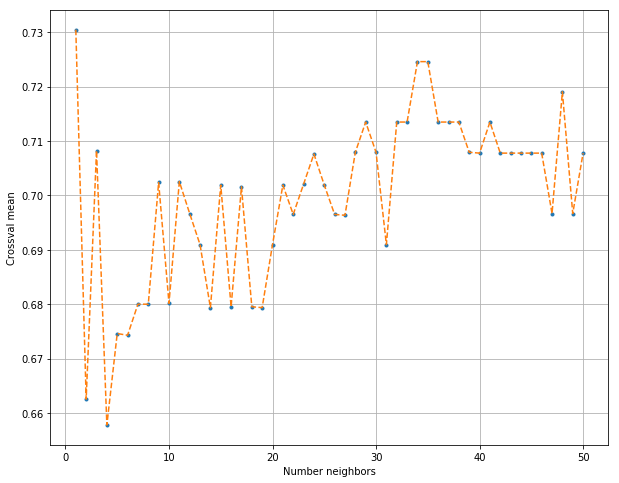

In [23]:
# Число соседей от 1 до 50
opt_rez = 0
k = 0
a_mean = []
for i in range(1,51,1):
    
# Оценка данных по связи с соседями
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(y, X) 
    
# Вывод данных кросс-валидации
    a = cross_val_score(neigh, y, X, cv = kf)
    a_mean.append(a.mean())
    if ( opt_rez < a.mean() ): 
        opt_rez = a.mean()
        k = i
print(opt_rez, k)   

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.ylabel('Crossval mean')
plt.xlabel('Number neighbors')
plt.plot([i for i in range(1, 51)], a_mean, '.')
plt.plot([i for i in range(1, 51)], a_mean, '--')

5. Произведите масштабирование признаков с помощью функции sklearn.preprocessing.scale. Снова найдите оптимальное k на кросс-валидации.

/Users/u17491440/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


0.9776190476190475 29


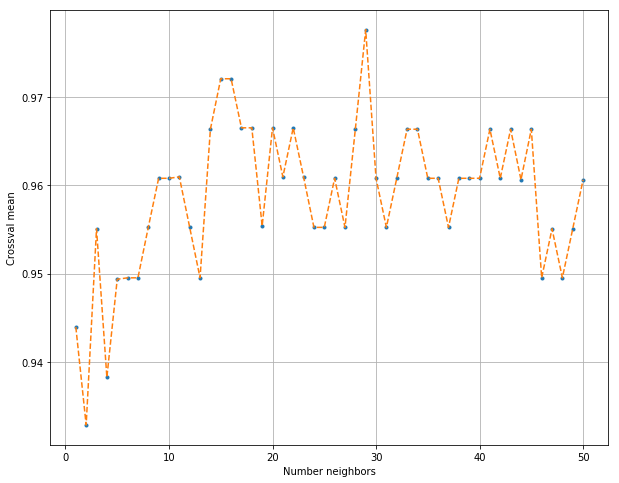

In [30]:
new_names=['Canary', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_2/wine.data',names=new_names)


X = data['Canary']
y = data[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']]
y = pd.DataFrame(scale(y), columns=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.split(X, y)

# Число соседей от 1 до 50
opt_rez = 0
k = 0
a_mean = []
for i in range(1,51,1):
    
# Оценка данных по связи с соседями
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(y, X) 
    
# Вывод данных кросс-валидации
    a = cross_val_score(neigh, y, X, cv = kf)
    a_mean.append(a.mean())
    if ( opt_rez < a.mean() ): 
        opt_rez = a.mean()
        k = i
print(opt_rez, k)   

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.ylabel('Crossval mean')
plt.xlabel('Number neighbors')
plt.plot([i for i in range(1, 51)], a_mean, '.')
plt.plot([i for i in range(1, 51)], a_mean, '--')

In [ ]:
При каком k получается максимальное качество без нормировки признаков?
1 
Чему равно максимальное качество без нормировки признаков (число в интервале от 0 до 1)?
0.73 
Какое оптимальное K получается после нормировки признаков?
29 
Чему равно максимальное качество после нормировки признаков (число в интервале от 0 до 1)?
0.98

## Эксперименты с параметрами метода

/Users/u17491440/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  if __name__ == '__main__':


0.9776190476190475 29


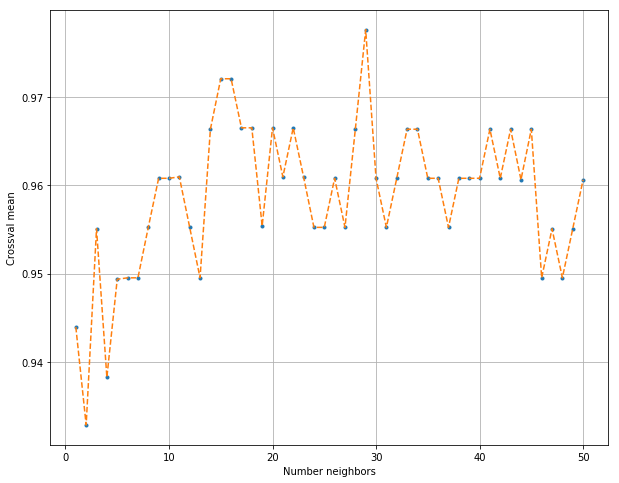

In [34]:
new_names=['Canary', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
data = pd.read_csv(r'/Users/u17491440/PycharmProjects/enterInML/data/week_2/wine.data',names=new_names)


X = data['Canary']
y = data[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']]
y = pd.DataFrame(scale(y), columns=['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols','Flavanoids', 
           'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline'])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
kf.split(X, y)

# Число соседей от 1 до 50
opt_rez = 0
k = 0
a_mean = []
for i in range(1,51,1):
    
# Оценка данных по связи с соседями 
#     neigh = KNeighborsClassifier(n_neighbors=i, weights='distance')
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(y, X) 
    
# Вывод данных кросс-валидации
    a = cross_val_score(neigh, y, X, cv = kf)
    a_mean.append(a.mean())
    if ( opt_rez < a.mean() ): 
        opt_rez = a.mean()
        k = i
print(opt_rez, k)   

plt.figure(figsize=(10, 8))
plt.grid(True)
plt.ylabel('Crossval mean')
plt.xlabel('Number neighbors')
plt.plot([i for i in range(1, 51)], a_mean, '.')
plt.plot([i for i in range(1, 51)], a_mean, '--')